# **Outgassing Materials Data Processing**

#### Imports (Always run before starting)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## Contents

1. **Data Preprocessing**
    - Cleaning and feature extraction code


For Logging

In [2]:
import gossipcat as gc

log_name = 'NASA_Materials_Project'
log_file = r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_2\project_NASA_Materials_Project\log\NASA_Materials_Project_EDA.log'

logger = gc.get_logger(logName=log_name, logFile=log_file)

Importing data

In [3]:
# Importing dataset
csv = r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_2\project_NASA_Materials_Project\data\raw\Outgassing_Db_20240702.csv'
data = pd.read_csv(csv)
material_df = pd.DataFrame(data)

## 1. **Data Preprocessing**

Reading in imported dataset and initial exploration of dataset

In [4]:
# logger.info('Imported dataset for initial exploration')

In [5]:
material_df.head()

,Sample Material,ID,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
0,"""V"" MATERIAL IN CLICKBOND CB4023V, GLASS/PEI -...",GSC33214,CLB,0.37,12,0.00,1.0,0.35,CLICKBOND,NaN
1,"""VC"" MATERIAL IN CLICKBOND CB9257VC, CARBON FI...",GSC33217,CLB,0.52,12,0.00,1.0,0.28,CLICKBOND,NaN
2,"0.5 MIL KAPTON KEVLAR, SHELDAHL 177544",GSC32950,SCH,2.48,6,0.05,1.0,1.97,BLANKET MATERIAL,NaN
3,0667 BLACK EPDM,GSC34174,PRS,0.65,15,0.13,1.0,0.07,ORING,NaN
4,1 INCH COPPER TAPE,GSC33829,MMM,0.24,16,0.08,1.0,0.01,TAPE,NaN


In [6]:
material_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12859 entries, 0 to 12858
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample Material  12859 non-null  object 
 1   ID               12859 non-null  object 
 2   MFR              12859 non-null  object 
 3   TML              12858 non-null  float64
 4   Category         12859 non-null  int64  
 5   CVCM             12853 non-null  float64
 6   Space Code       12857 non-null  float64
 7   WVR              10047 non-null  float64
 8   Material Usage   12857 non-null  object 
 9   Cure             6989 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1004.7+ KB


In [7]:
material_df = material_df.set_index('ID')

In [8]:
material_df.describe()

,TML,Category,CVCM,Space Code,WVR
count,12858.000000,12859.000000,12853.000000,12857.000000,10047.000000
mean,2.151247,10.497628,0.407235,1.167535,0.342308
std,5.521467,19.563948,2.237969,0.470268,1.235159
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,1.000000,0.010000,1.000000,0.040000
50%,0.810000,6.000000,0.040000,1.000000,0.150000
75%,1.850000,13.000000,0.180000,1.000000,0.370000
max,100.000000,99.000000,99.990000,9.000000,99.990000


- TML: High variance with values ranging from 0 to 100.
- CVCM: Also shows high variance, suggesting outliers or diverse material behaviors.
- Space Code: Predominantly around 1, indicating similar ratings for most materials.
- WVR: High variance with values ranging from 0 to 99.99.

In [9]:
# TML_filtered = material_df['TML'].quantile(0.75)
# CVCM_filtered = material_df['CVCM'].quantile(0.75)
# WVR_filtered = material_df['WVR'].quantile(0.75)
# Space_Code_filtered = material_df['Space Code'].quantile(0.90)

# material_df_filtered = material_df[(material_df['TML'] <= TML_filtered) &
#                                     (material_df['CVCM'] <= CVCM_filtered) &
#                                     (material_df['WVR'] <= WVR_filtered) &
#                                     (material_df['Space Code'] <= Space_Code_filtered)
#                                     ]

In [10]:
# logger.info('Filtered dataset to remove outliers')

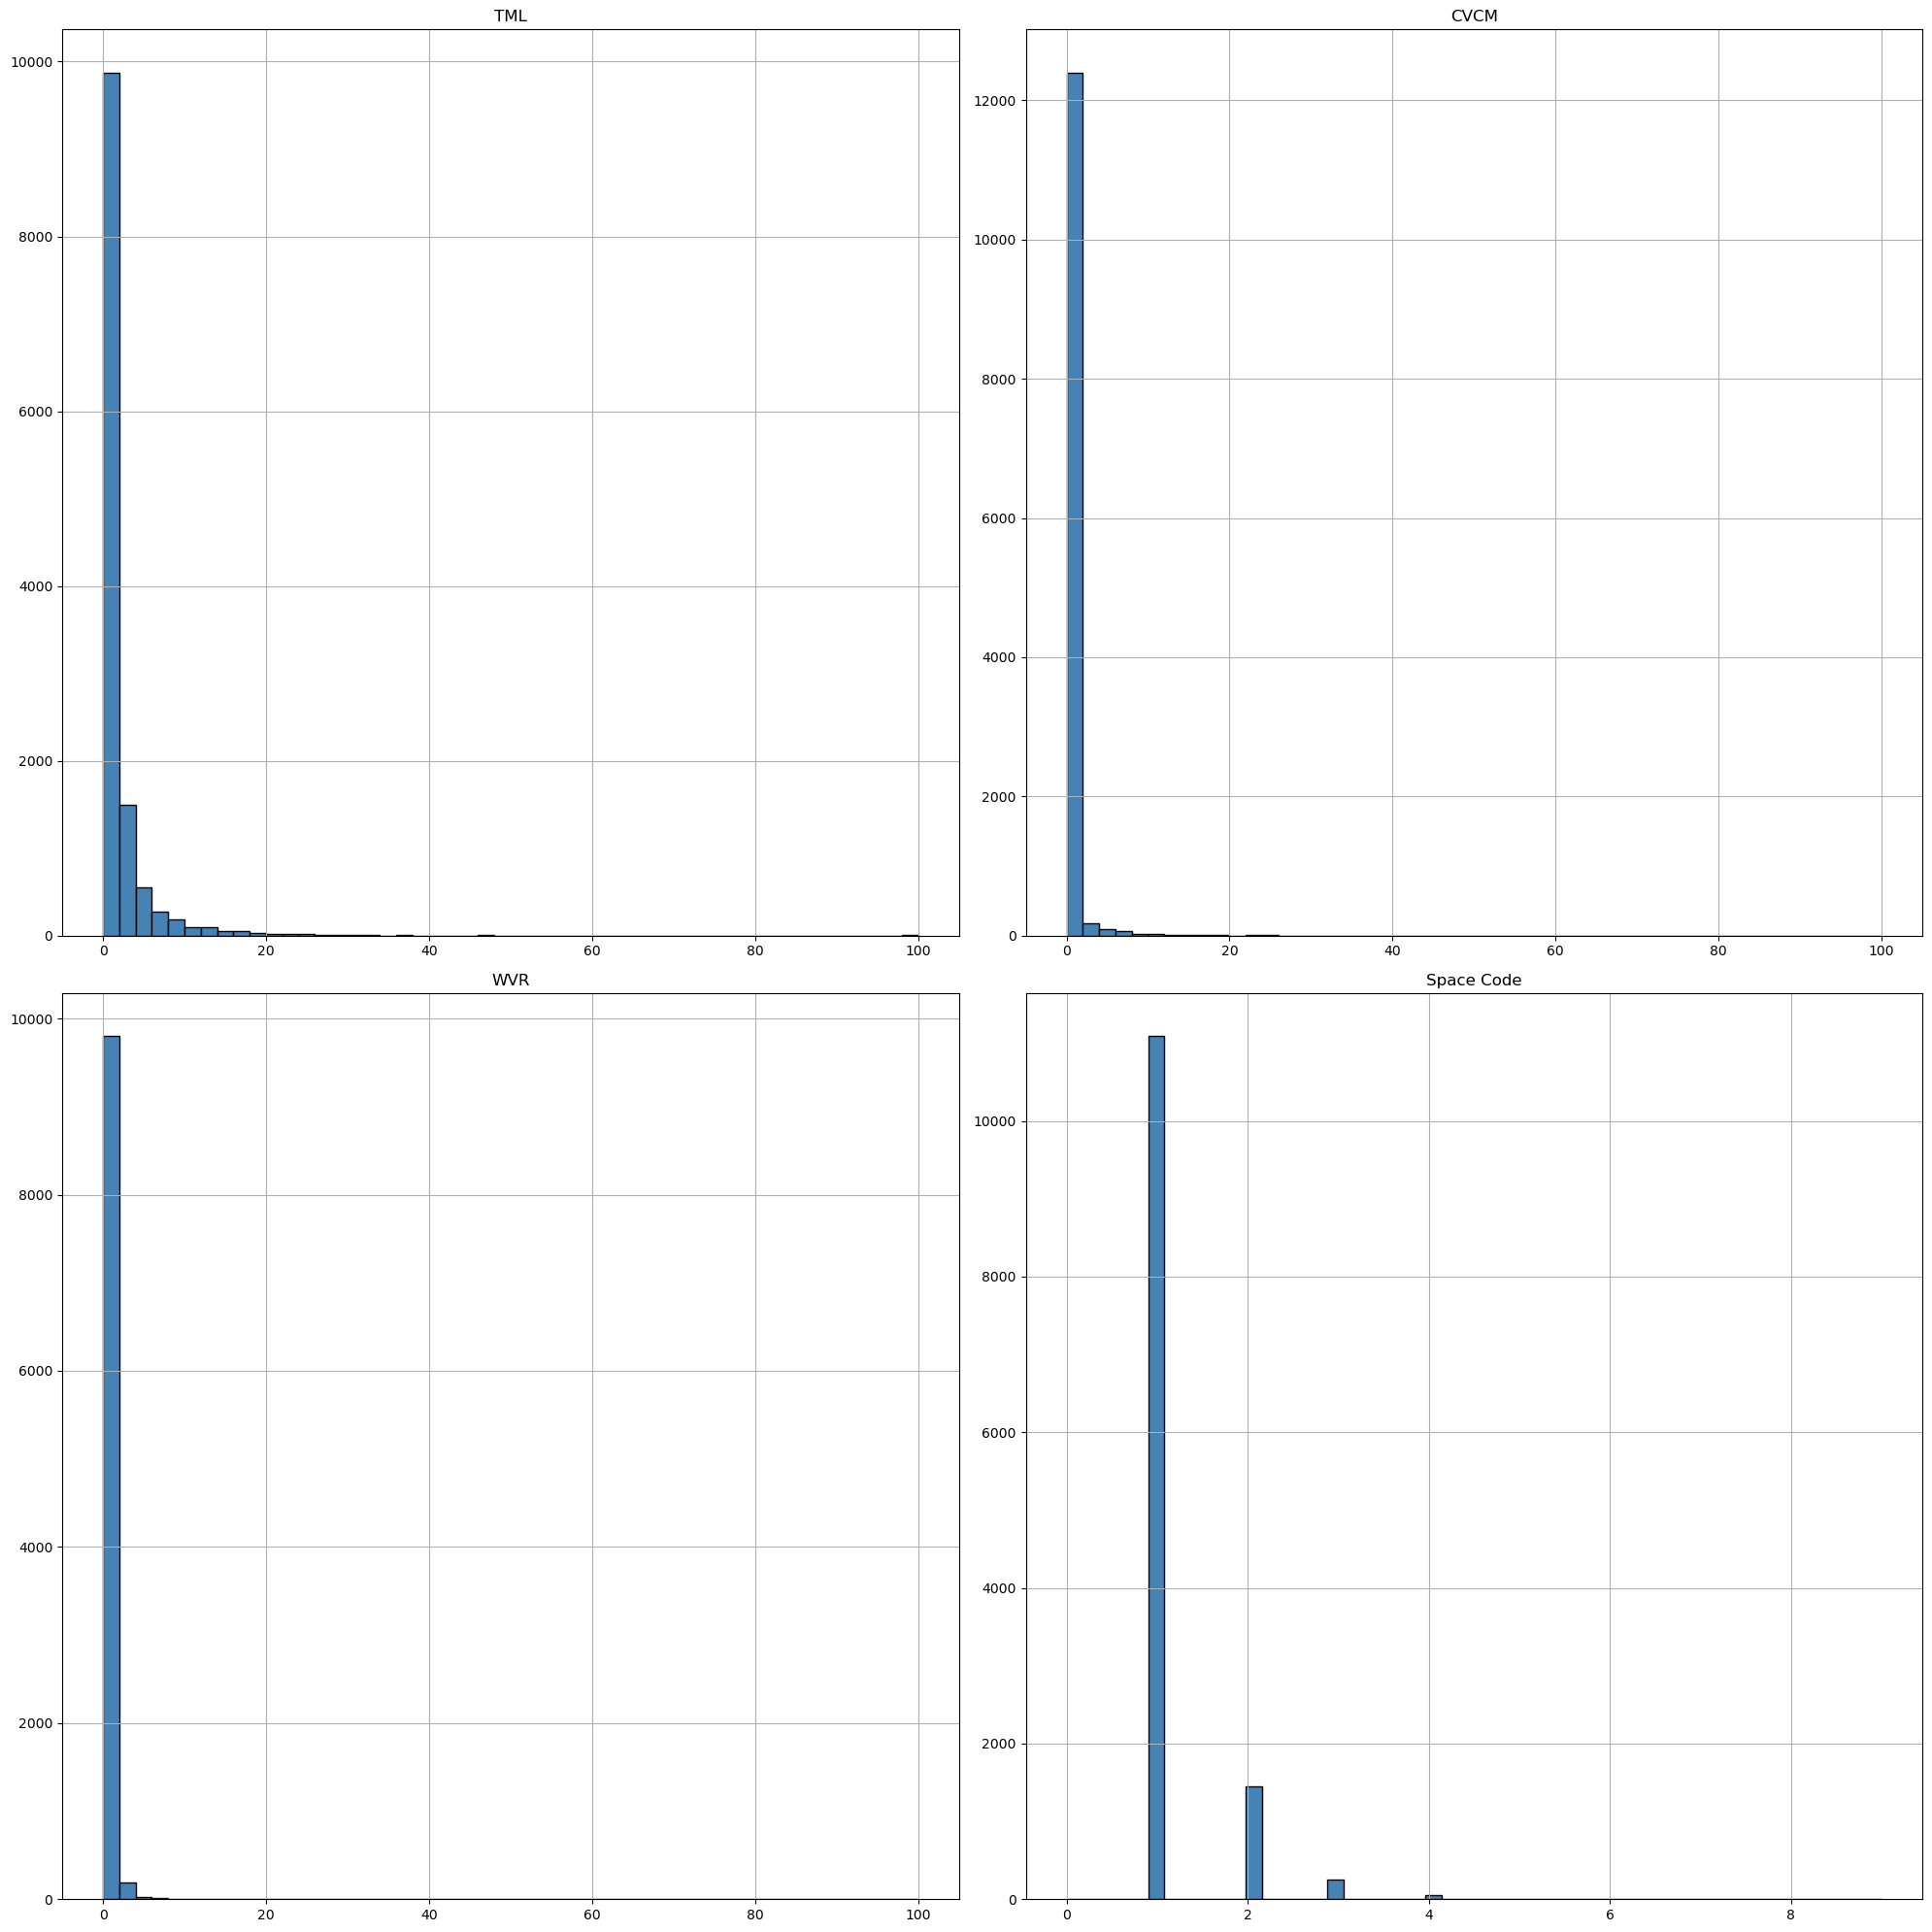

In [11]:
material_df.hist(column=['TML', 'CVCM', 'WVR', 'Space Code'], bins=50, figsize=(20,20), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

'do anaysis of the graphs...'

Box plots for each category to visualize outliers

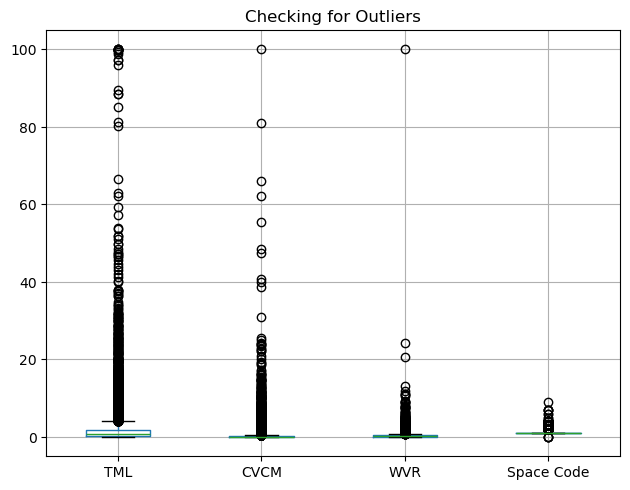

In [12]:
material_df.boxplot(column = ['TML', 'CVCM', 'WVR', 'Space Code'])
plt.tight_layout()
plt.title('Checking for Outliers')
plt.show()

In [13]:
# logger.info('Removing further outliers')

Interquartile range (IQR) method to further remove outliers

In [14]:
# Making IQR function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Removing outliers from the dataset
material_no_outliers = material_df.copy()
material_no_outliers = remove_outliers(material_no_outliers, 'TML')
material_no_outliers = remove_outliers(material_no_outliers, 'CVCM')
material_no_outliers = remove_outliers(material_no_outliers, 'WVR')

#checking
material_no_outliers.shape

(7571, 9)

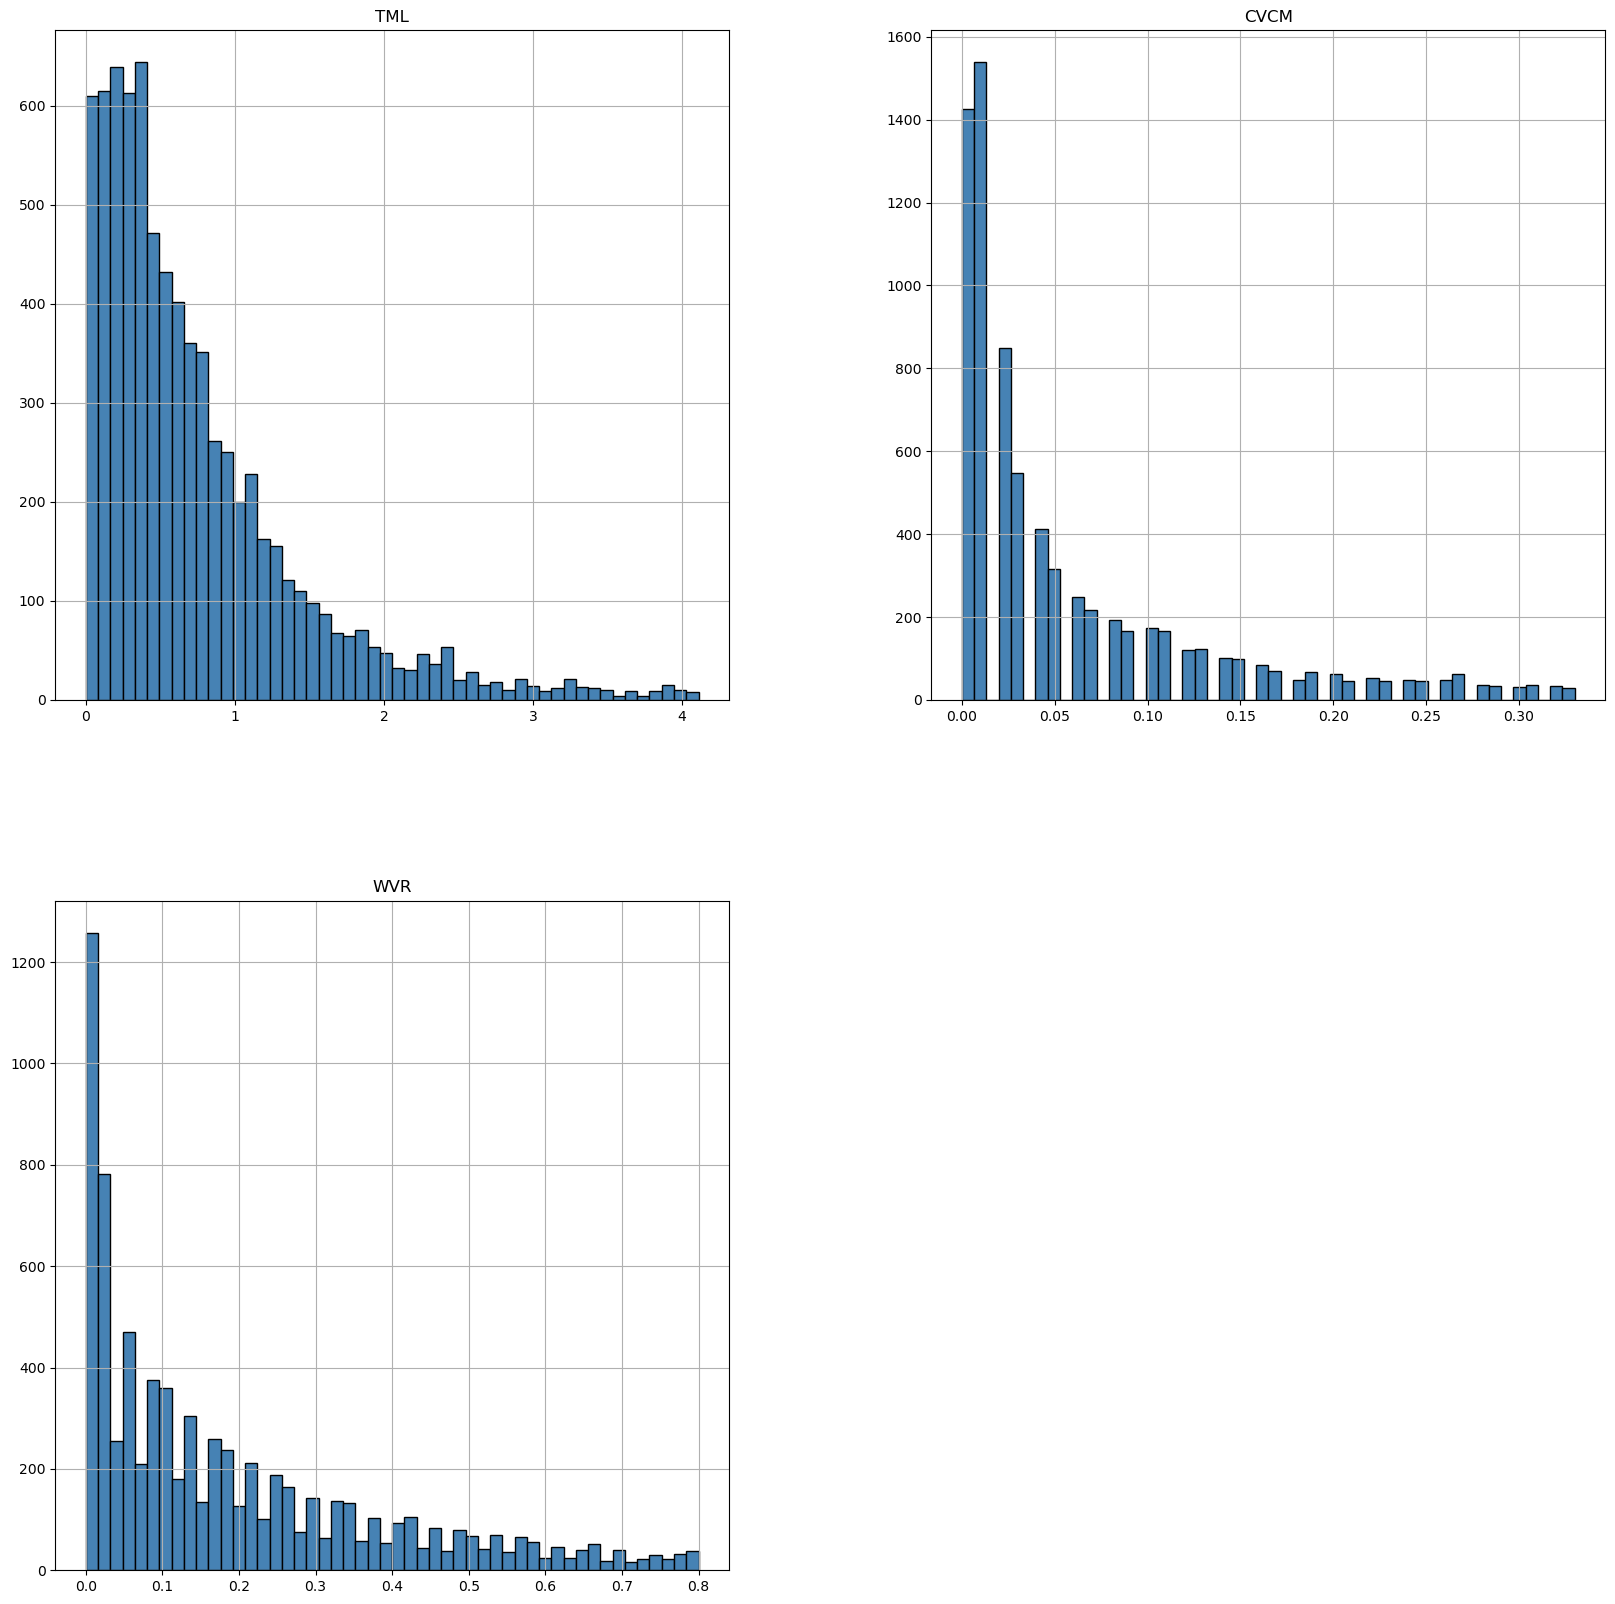

In [15]:
#checking hist for updated data distribution
material_no_outliers.hist(column=['TML', 'CVCM', 'WVR'], bins=50, figsize=(20,20), color='steelblue', edgecolor='black')
plt.show()

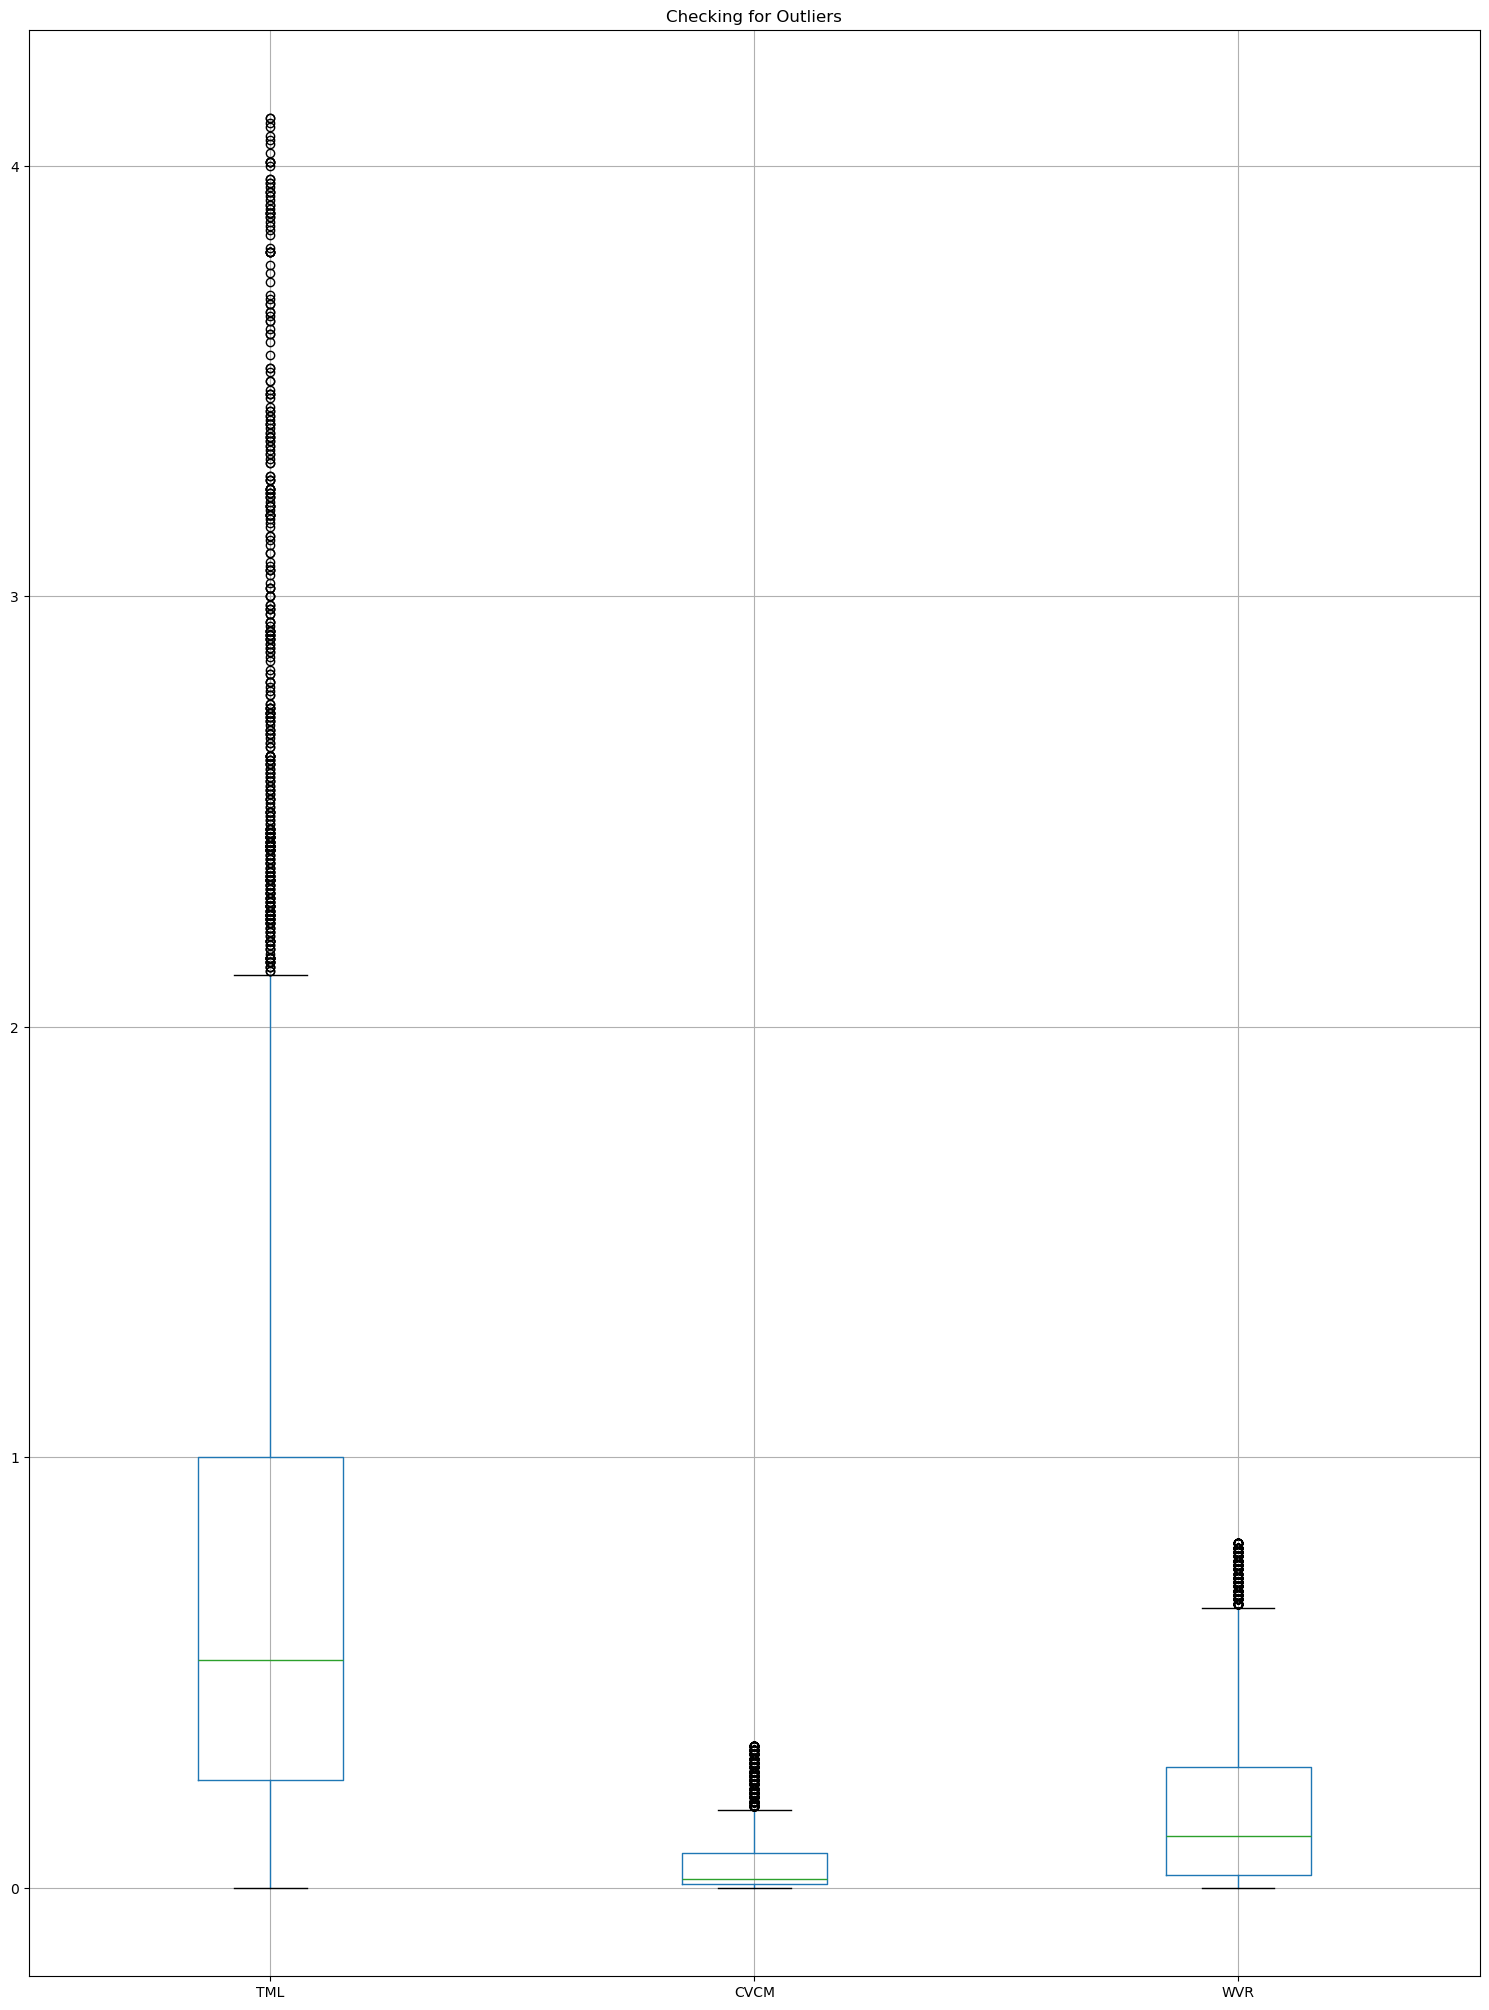

In [16]:
#chceking with graph
material_no_outliers.boxplot(column = ['TML', 'CVCM', 'WVR'], figsize=(15,20) )
plt.tight_layout()
plt.title('Checking for Outliers')
plt.show()

Handling missing values

In [17]:
material_no_outliers.isnull().sum()

Sample Material       0
MFR                   0
TML                   0
Category              0
CVCM                  0
Space Code            1
WVR                   0
Material Usage        2
Cure               3474
dtype: int64

dropping and checking missing values

In [18]:
material_cleaned = material_no_outliers.copy()

material_cleaned = material_cleaned.drop('Cure', axis=1)

material_cleaned = material_cleaned.dropna(subset=['Material Usage'], axis=0)
material_cleaned = material_cleaned.dropna(subset=['Space Code'], axis=0)

material_cleaned.isnull().sum()

Sample Material    0
MFR                0
TML                0
Category           0
CVCM               0
Space Code         0
WVR                0
Material Usage     0
dtype: int64

In [19]:
material_final = pd.DataFrame(material_cleaned)

material_final.columns

Index(['Sample Material', 'MFR', 'TML', 'Category', 'CVCM', 'Space Code',
       'WVR', 'Material Usage'],
      dtype='object')

Handing any duplicates

In [20]:
#Checking for duplicates
material_final.duplicated().sum()

9

In [21]:
#dropping all duplicates
material_final = material_final.drop_duplicates()
#checking for duplicates again
material_final.duplicated().sum()


0

In [22]:
# logger.info('Final dataset for EDA saved in result as cleaned_Outgassing_Db_20240702.csv')

In [23]:
#saving final dataset as csv file
material_final.to_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_2\project_NASA_Materials_Project\data\result\cleaned_Outgassing_Db_20240702.csv')



---



---



# END
For EDA please find 'Outgassing_Materials_EDA.ipynb'


---



---